In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [92]:
import scipy.signal as sig

In [44]:
def fft_freq_axis_hz(pnts,srate):
    return np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

def fft_amp_scaled_abs(fCoefs,fpos_range=[]):
    if type(fpos_range) is np.ndarray:
        fpos_range = len(fpos_range)
    else:
        if not fpos_range:
            fpos_range = len(fCoefs)
    
    return 2*np.abs(fCoefs)[0:fpos_range] / len(fCoefs)

def fft_amp2power_abs(amps):
    return amps*amps;

def fft_phase(fCoefs, fpos_range=[]):
    if type(fpos_range) is np.ndarray:
        fpos_range = len(fpos_range)
    else:
        if not fpos_range:
            fpos_range = len(fCoefs)
            
    return np.angle(fCoefs)[0:fpos_range]

def phase_read2deg(p):
     return p*(180/np.pi)

def fft_complete(signal,srate):
    pnts = len(signal)
    fCoefs = np.fft.fft(signal) 
    hz = fft_freq_axis_hz(pnts,srate)
    amp = fft_amp_scaled_abs(fCoefs,hz)
    pwr = fft_amp2power_abs(amp)
    ph = fft_phase(fCoefs, hz)
    ph_deg = phase_read2deg(ph)
    return fCoefs,hz,amp,pwr,ph,ph_deg

In [78]:
# create artifical signal
srate  = 100 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points+
ph_shift = 90*np.pi/180
signal = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )
signal2 = 2.5 * np.sin( 2*np.pi*4*time +ph_shift) + 1.5 * np.sin( 2*np.pi*6.5*time +ph_shift)

In [79]:
fCoefs,hz,amp,pwr,ph,ph_deg = fft_complete(signal,srate)
fCoefs2,hz2,amp2,pwr2,ph2,ph_deg2 = fft_complete(signal2,srate)

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

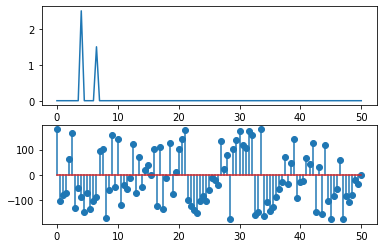

In [80]:
plt.subplot(211)
plt.plot(hz,amp)
plt.subplot(212)
plt.stem(hz,ph_deg)

(0.0, 10.0)

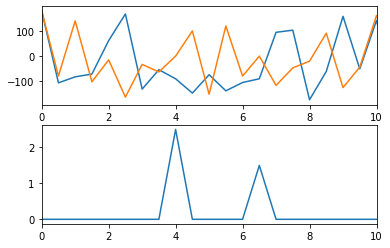

In [83]:
plt.subplot(211)
plt.plot(hz,ph_deg)
plt.plot(hz,ph_deg2)
plt.xlim((0, 10))
plt.subplot(212)
plt.plot(hz,amp)
plt.xlim((0, 10))

In [119]:
# todo peack finding
peacks_values = [4, 6.5]
peacks_index = sig.find_peaks(amp, threshold=0.5)[0]
peacks_values = amp[peacks_index]
peacks_freq = hz[peacks_index]
print(peacks_values)
print(peacks_freq)
print(peacks_index)

[2.5 1.5]
[4.  6.5]
[ 8 13]


In [128]:
print(ph_deg[peacks_index])
print(ph_deg2[peacks_index])
print(ph_deg[np.int32(peacks_index+np.ones(2)*1)])
print(ph_deg2[np.int32(peacks_index+np.ones(2)*1)])
print(ph_deg[np.int32(peacks_index+np.ones(2)*-1)])
print(ph_deg2[np.int32(peacks_index+np.ones(2)*-1)])

[-90. -90.]
[-3.86672865e-15  1.02353260e-13]
[-146.97602867   94.71743271]
[ 100.18262755 -116.34161835]
[ -54.06928051 -104.89057842]
[-62.80945865 -79.26559962]


In [125]:
np.int32(peacks_index+np.ones(2)*1)

array([ 9, 14])

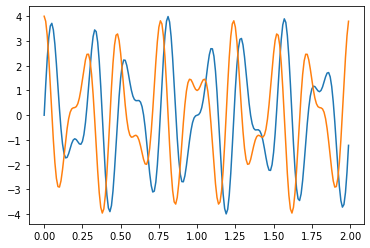

In [82]:
plt.plot(time,signal)
plt.plot(time,signal2)

In [ ]:
plt.subplot(211)
plt.stem(np.log(hz),amp)
plt.subplot(212)
plt.stem(np.log(hz),ph_deg)

In [59]:
# reverse

refsig = np.fft.ifft(fCoefs)


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


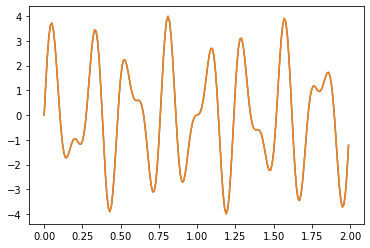

In [62]:
plt.plot(time,refsig)
plt.plot(time,signal)
